In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("./data/nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [2]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Relabel the marital status variable DMDMARTL to have brief but informative character labels. Then construct a frequency table of these values for all people, then for women only, and for men only. Then construct these three frequency tables using only people whose age is between 30 and 40.

In [3]:
da["DMDMARTL"].fillna("Missing").value_counts()

1.0        2780
5.0        1004
3.0         579
6.0         527
2.0         396
Missing     261
4.0         186
77.0          2
Name: DMDMARTL, dtype: int64

In [4]:
#Releveling the Martial Status
da["DMDMARTLx"] = da["DMDMARTL"].replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated",5:"Never Married",6:"Living with partner",77:"Refused",99:"Don't know"})
da["DMDMARTLx"].value_counts()
da["RIAGENDRx"] = da["RIAGENDR"].replace({1: "Male", 2: "Female"})
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da.groupby("agegrp")["DMDMARTLx"].value_counts()


agegrp    DMDMARTLx          
(30, 40]  Married                516
          Never Married          186
          Living with partner    129
          Divorced                67
          Separated               29
          Widowed                  4
          Refused                  1
Name: DMDMARTLx, dtype: int64

In [5]:
da["DMDMARTLx"].value_counts()

Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [6]:
da.groupby("RIAGENDRx")["DMDMARTLx"].value_counts()

RIAGENDRx  DMDMARTLx          
Female     Married                1303
           Never Married           520
           Divorced                350
           Widowed                 296
           Living with partner     262
           Separated               118
           Refused                   1
Male       Married                1477
           Never Married           484
           Living with partner     265
           Divorced                229
           Widowed                 100
           Separated                68
           Refused                   1
Name: DMDMARTLx, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

From the above Distribution of the martial status of Men & Women, We can see that 
    1. More men are married than of Women.
    2. It seems more women are divorced than men.
    3. Most of indiaviduals in women are likely to be lost their partners.


__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [7]:
# Getting the Data of the Men and Women from Age Group 30-40
x = da.groupby(["agegrp","RIAGENDRx"])["DMDMARTLx"].value_counts()
x /=  x.sum()
# da.groupby(["agegrp","RIAGENDRx"])["DMDMARTLx"].value_counts()
x

agegrp    RIAGENDRx  DMDMARTLx          
(30, 40]  Female     Married                0.276824
                     Never Married          0.104077
                     Living with partner    0.061159
                     Divorced               0.046137
                     Separated              0.018240
                     Widowed                0.002146
          Male       Married                0.276824
                     Never Married          0.095494
                     Living with partner    0.077253
                     Divorced               0.025751
                     Separated              0.012876
                     Widowed                0.002146
                     Refused                0.001073
Name: DMDMARTLx, dtype: float64

In [8]:
# Getting the Data of the Akk Men and Women
y = da.groupby("RIAGENDRx")["DMDMARTLx"].value_counts()
y /= y.sum()
y

RIAGENDRx  DMDMARTLx          
Female     Married                0.238034
           Never Married          0.094995
           Divorced               0.063939
           Widowed                0.054074
           Living with partner    0.047863
           Separated              0.021556
           Refused                0.000183
Male       Married                0.269821
           Never Married          0.088418
           Living with partner    0.048411
           Divorced               0.041834
           Widowed                0.018268
           Separated              0.012422
           Refused                0.000183
Name: DMDMARTLx, dtype: float64

1. From overall women martial status we can see that where 23% of Female are married Where 27% women are of the age range 30-40.
2. We can see here that from overall women around 2% are separated but 1% are separated in this age range which is 14% are from this range which are separated.


__Q1c.__ Repeat part b for the men.

1. From overall men martial status we can see that where 26% of Men are married Where 27% men are of the age range 30-40.
2. We can see here that from overall women around 2% are separated but 1% are separated in this age range which is 14% are from this range which are separated.


## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [9]:
da.loc[da['RIAGENDRx'] == "Male", "male1"] = "Male" 


da["agegrpx"] = pd.cut(da.RIDAGEYR,[10,20,30,40,50,60,70,80])
da["agegrpx"].value_counts()

z = da.groupby(["male1", "agegrpx"])["DMDMARTLx"].value_counts()
z /= z.sum() 
z * 100

male1  agegrpx   DMDMARTLx          
Male   (10, 20]  Never Married           1.371951
                 Living with partner     0.114329
                 Married                 0.038110
       (20, 30]  Never Married           8.612805
                 Married                 3.925305
                 Living with partner     3.506098
                 Separated               0.266768
                 Divorced                0.076220
                 Widowed                 0.076220
       (30, 40]  Married                 9.832317
                 Never Married           3.391768
                 Living with partner     2.743902
                 Divorced                0.914634
                 Separated               0.457317
                 Widowed                 0.076220
                 Refused                 0.038110
       (40, 50]  Married                10.746951
                 Never Married           1.486280
                 Divorced                1.295732
             

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

We can see here that The age of the marrige ranges between 20-30 and most of them remain married for 60 to 70 years
We can see that now a days most young people in 10 to 30 prefers to live with partner before marriage 
Men are getting divorced from their partners from 30 to 40 and its increasing to around 65
Most men lost their partners at 70 and above rather than other ages... 

In [10]:
da.loc[da['RIAGENDRx'] == "Female", "female1"] = "Female" 


da["agegrpx"] = pd.cut(da.RIDAGEYR,[10,20,30,40,50,60,70,80])
da["agegrpx"].value_counts()

z = da.groupby(["female1", "agegrpx"])["DMDMARTLx"].value_counts()
z /= z.sum() 
z * 100

female1  agegrpx   DMDMARTLx          
Female   (10, 20]  Never Married           1.052632
                   Living with partner     0.280702
                   Married                 0.035088
         (20, 30]  Never Married           8.035088
                   Married                 5.508772
                   Living with partner     3.719298
                   Divorced                0.385965
                   Separated               0.385965
         (30, 40]  Married                 9.052632
                   Never Married           3.403509
                   Living with partner     2.000000
                   Divorced                1.508772
                   Separated               0.596491
                   Widowed                 0.070175
         (40, 50]  Married                10.105263
                   Divorced                2.421053
                   Never Married           2.210526
                   Living with partner     1.298246
                   Separa

__Q2c__. Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3
Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample

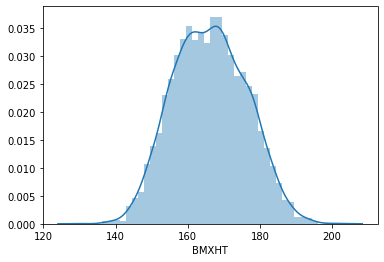

In [11]:
sns.distplot(da.BMXHT.dropna())

__Q3a.__ Use the bins argument to distplot to produce histograms with different numbers of bins. Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small.

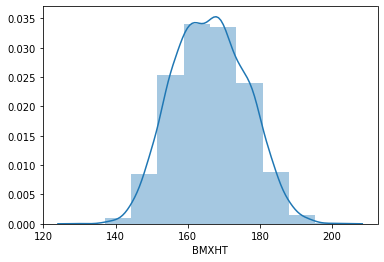

In [12]:
sns.distplot(da.BMXHT.dropna(), bins=10)

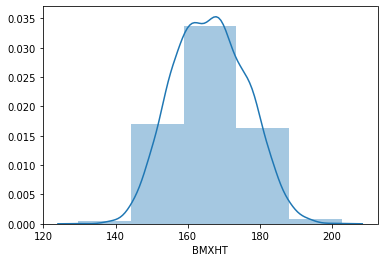

In [13]:
sns.distplot(da.BMXHT.dropna(), bins=5)

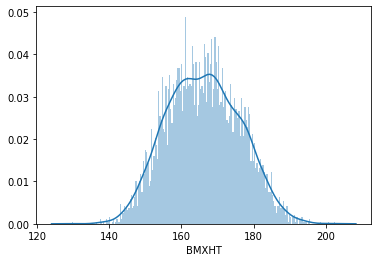

In [14]:
sns.distplot(da.BMXHT.dropna(), bins=220)

We can see that when we decreases the bins value, in case here 5 Bins are too wide which is making difficulties to get the spike at highest point, they won't helping to summarize details correctly. And in the same way if we increase the bins value here  i take 220 we can see that they so narrow that we cant predict anything correctly.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

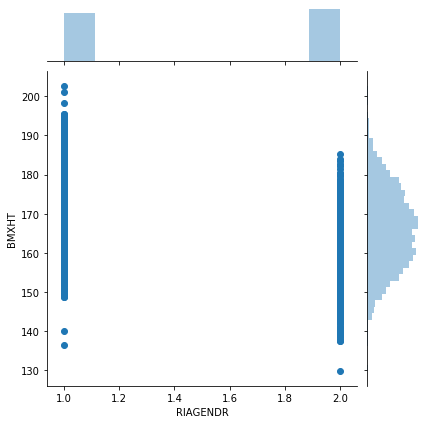

In [15]:
sns.jointplot(y="BMXHT", x="RIAGENDR", data=da)

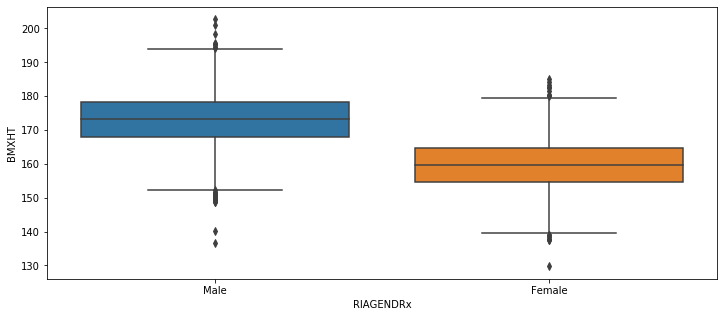

In [16]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BMXHT", data=da)

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms

## Question 4
Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents (BPXSY1 and BPXSY2).

Text(0, 0.5, 'Blodd Pressure in mm/Hg')

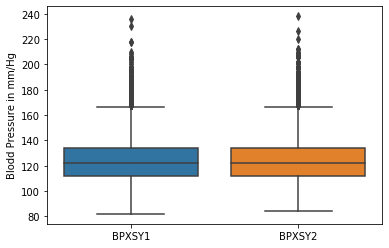

In [17]:
#4b
bp = sns.boxplot(data=da.loc[:,["BPXSY1","BPXSY2"]])
bp.set_ylabel("Blodd Pressure in mm/Hg")

In [18]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDMARTLx', 'RIAGENDRx', 'agegrp', 'male1',
       'agegrpx', 'female1'],
      dtype='object')

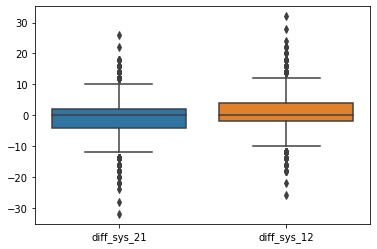

In [20]:
#4a
da["diff_sys_21"] = da["BPXSY2"] - da["BPXSY1"]
da["diff_sys_12"] = da["BPXSY1"] - da["BPXSY2"]
bp = sns.boxplot(data=da.loc[:,["diff_sys_21", "diff_sys_12"]])

## Question 5
Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is DMDEDUC2). Convert the frequencies to proportions

In [21]:
da["DMDHHSIZ"].value_counts()

2    1546
3    1037
4     936
1     770
5     699
6     379
7     368
Name: DMDHHSIZ, dtype: int64

In [22]:
# da["DMDEDUC2"].value_counts()
da["DMDEDUC2x"] = da["DMDEDUC2"].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDEDUC2x"].value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [23]:
z = da.groupby(["agegrp","RIAGENDRx","DMDEDUC2x"])["DMDHHSIZ"].median()
z

agegrp    RIAGENDRx  DMDEDUC2x      
(30, 40]  Female     9-11               5.0
                     <9                 5.0
                     College            4.0
                     Don't know         NaN
                     HS/GED             5.0
                     Some college/AA    4.0
          Male       9-11               5.0
                     <9                 5.0
                     College            3.0
                     Don't know         NaN
                     HS/GED             4.0
                     Some college/AA    4.0
Name: DMDHHSIZ, dtype: float64

## Question 6
The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables SDMVSTRA and SDMVPSU. Calculate the mean age (RIDAGEYR), height (BMXHT), and BMI (BMXBMI) for each gender (RIAGENDR), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [34]:
age_mvstra = da.groupby(["RIAGENDRx","SDMVSTRA"])["RIDAGEYR"].mean()
age_mvpsu = da.groupby(["RIAGENDRx","SDMVPSU"])["RIDAGEYR"].mean()

height_mvstra = da.groupby(["RIAGENDRx","SDMVSTRA"])["BMXHT"].mean()
height_mvpsu = da.groupby(["RIAGENDRx","SDMVPSU"])["BMXHT"].mean()

bmi_mvstra = da.groupby(["RIAGENDRx","SDMVSTRA"])["BMXBMI"].mean()
bmi_mvpsu = da.groupby(["RIAGENDRx","SDMVPSU"])["BMXBMI"].mean()

height_rat_mvstra = height_mvstra.max()/ height_mvstra.min()
height_rat_mvpsu = height_mvpsu.max()/ height_mvpsu.min()

bmi_rat_mvstra = bmi_mvstra.max()/ bmi_mvstra.min()
bmi_rat_mvpsu = bmi_mvpsu.max()/bmi_mvpsu.min()

age_rat_mvstra = age_mvstra.max()/age_mvstra.min()
age_rat_mvpsu = age_mvpsu.max()/age_mvpsu.min()

print("Age: MVPSU: {} MVSTRA: {}".format(age_rat_mvstra,age_rat_mvpsu))
print("BMI: MVPSU: {} MVSTRA: {}".format(bmi_rat_mvstra,bmi_rat_mvpsu))
print("Height: MVPSU: {} MVSTRA: {}".format(height_rat_mvstra,height_rat_mvpsu))

Age: MVPSU: 1.2271256075499664 MVSTRA: 1.020238468226161
BMI: MVPSU: 1.1739127256352004 MVSTRA: 1.0741236407142285
Height: MVPSU: 1.1207084159644929 MVSTRA: 1.088563655296235


In [50]:
# Simple way to get this
z = da.groupby(["SDMVSTRA","SDMVPSU","RIAGENDRx"])["RIDAGEYR","BMXHT","BMXBMI"].quantile(0.75) - da.groupby(["SDMVSTRA","SDMVPSU","RIAGENDRx"])["RIDAGEYR","BMXHT","BMXBMI"].quantile(0.25)

C:\Users\Aditya Mishra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [47]:
z.iloc[1]

43.67836257309941